In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TensorFlow_FILES/DATA/fake_reg.csv")

In [3]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


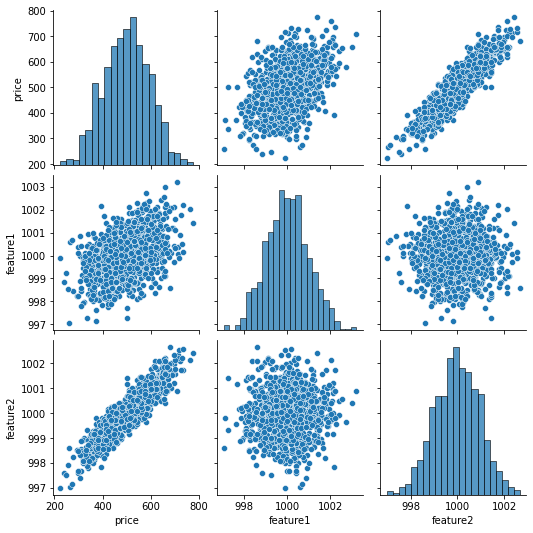

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [7]:
X = df[["feature1", "feature2"]].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
y = df["price"].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler().fit(XTrain)
scaler

MinMaxScaler()

In [12]:
XTrain = scaler.transform(XTrain)
XTest = scaler.transform(XTest)

In [13]:
from tensorflow.keras.models import Sequential

2022-09-22 05:18:42.780257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 05:18:42.947244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 05:18:42.947277: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 05:18:42.982540: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 05:18:44.041190: W tensorflow/stream_executor/platform/de

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [39]:
model = Sequential([Dense(4, activation = "relu"),
                    Dense(2, activation = "relu"),
                    Dense(1)])

#method 2

model2 = Sequential()
model2.add(Dense(4, activation = "relu"))
model2.add(Dense(3, activation = "relu"))
model2.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")
model2.compile(optimizer = "adam", loss = "mse")

In [40]:
model.fit(x = XTrain, y = yTrain, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256701.4688
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256447.9844
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256202.7656
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255946.8281
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255693.3906
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255473.9844
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255284.5781
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255090.2812
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254887.0000
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254672.0625
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254445.2188
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [41]:
model2.fit(x = XTrain, y = yTrain, epochs = 250)


Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 255722.3594
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 255501.9375
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255263.7656
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255000.9531
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254716.0000
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254404.9219
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254065.4219
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 253690.1562
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 253275.1562
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 252815.2188
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252311.2969
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

<AxesSubplot:>

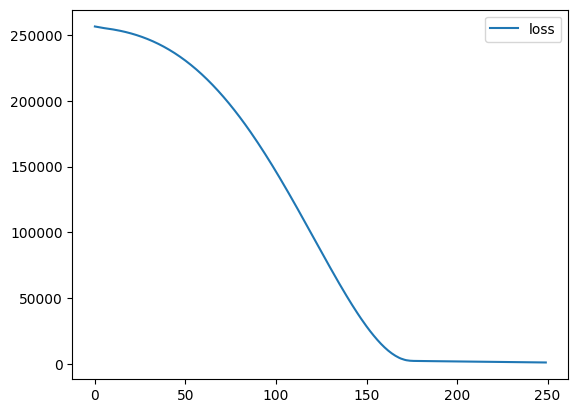

In [42]:
lossDf = pd.DataFrame(model.history.history)
lossDf.plot()

In [43]:
lossDf2 = pd.DataFrame(model2.history.history)
lossDf2

,loss
0,255722.359375
1,255501.937500
2,255263.765625
3,255000.953125
4,254716.000000
...,...
245,1121.582397
246,1117.153198
247,1112.856689
248,1108.643066


<AxesSubplot:>

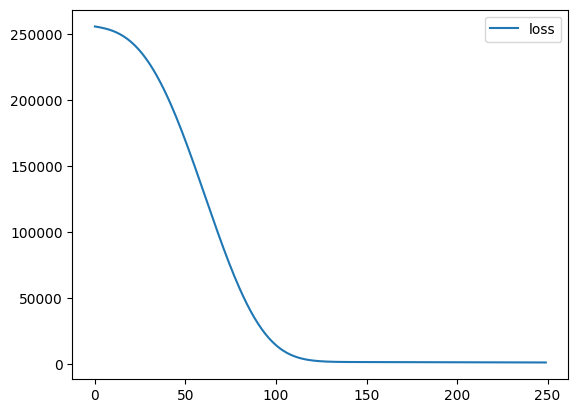

In [44]:
lossDf2.plot()

In [45]:
model.evaluate(XTest, yTest, verbose = 0)

853.0010986328125

In [46]:
model2.evaluate(XTest, yTest, verbose = 0)

972.9608154296875

In [47]:
model.evaluate(XTrain, yTrain, verbose = 0)


968.1826171875

In [48]:
model2.evaluate(XTrain, yTrain, verbose = 0)


1101.734130859375

In [49]:
predictions1 = pd.DataFrame(model.predict(XTest), columns = ["predictions 1"])
predictions2 = pd.DataFrame(model2.predict(XTest), columns = ["predictions 2"])


10/10 [==============================] - 0s 1ms/step


In [50]:
predictions = pd.concat([pd.DataFrame(yTest, columns = ["yTrue"]), predictions1, predictions2], axis = 1)

In [51]:
predictions

,yTrue,predictions 1,predictions 2
0,351.429081,408.648315,410.729584
1,449.797212,464.855774,467.069946
2,503.390001,490.273987,492.929840
3,526.726731,511.569031,512.500488
4,518.263124,514.009827,513.710022
...,...,...,...
295,452.734499,477.458313,476.922394
296,423.052434,460.045624,460.264099
297,579.498008,560.346680,557.815186
298,637.271611,610.520081,603.869141


<AxesSubplot:xlabel='yTrue', ylabel='predictions 1'>

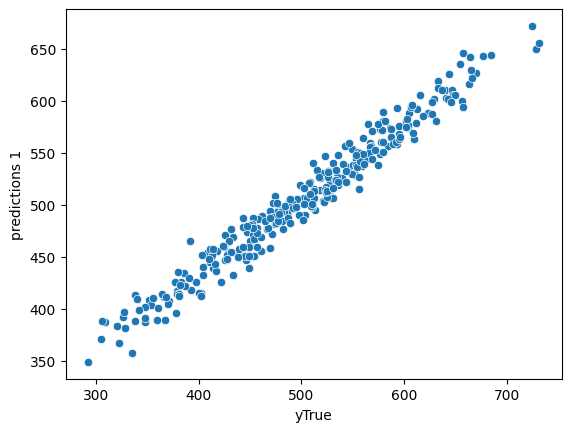

In [52]:
sns.scatterplot(x = "yTrue", y = "predictions 1", data = predictions)

<AxesSubplot:xlabel='yTrue', ylabel='predictions 2'>

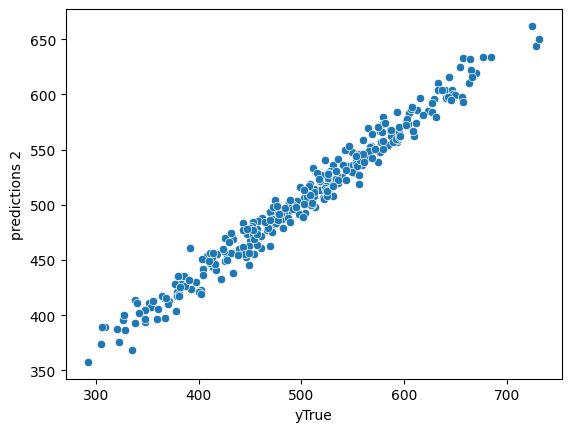

In [53]:
sns.scatterplot(x = "yTrue", y = "predictions 2", data = predictions)


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
mean_absolute_error(yTest, predictions["predictions 1"])

23.436993687503723

In [56]:
mean_absolute_error(yTest, predictions["predictions 2"])


25.172086054382724

In [57]:
mean_squared_error(yTest, predictions["predictions 1"])


853.0010209354992

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save("model1.h5")
model2.save("model2.h5")